# Assignment 4- Mughilun T

# CUSTOMER SEGMENTATION ANALYSIS

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# 1. Download the dataset 
# 2. Load the dataset into the tool.

In [63]:
data = pd.read_csv(r"Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [64]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [65]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


# 3. Perform Below Visualizations.

# UNIVARIATE ANALYSIS

array([[<AxesSubplot:title={'center':'CustomerID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Annual Income (k$)'}>,
        <AxesSubplot:title={'center':'Spending Score (1-100)'}>]],
      dtype=object)

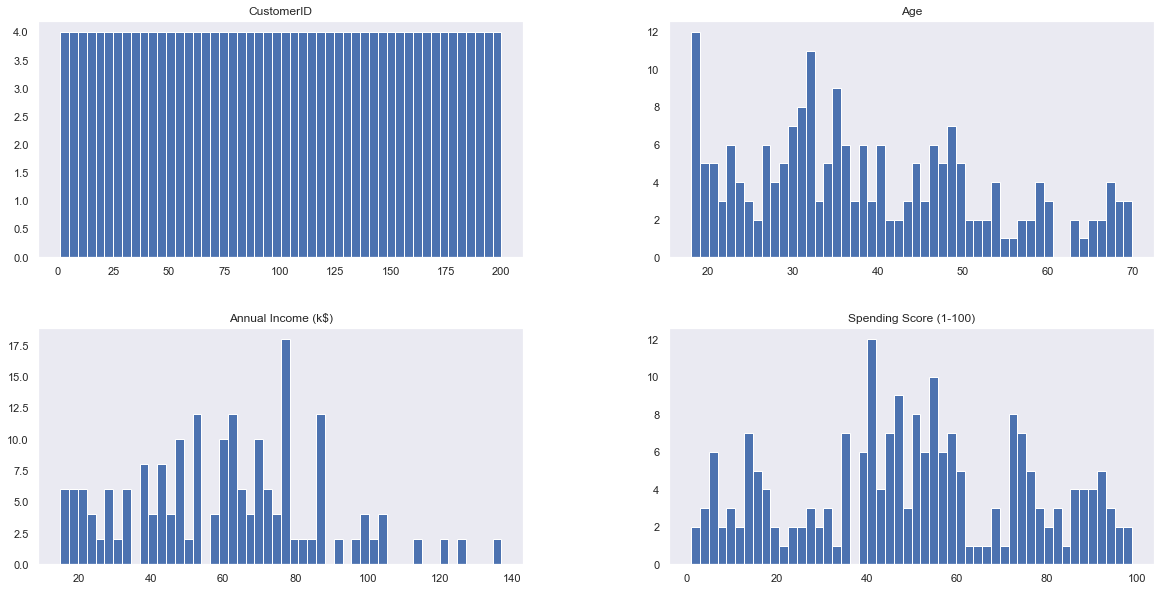

In [66]:
data.hist(figsize=(20,10), grid = False, bins = 50)

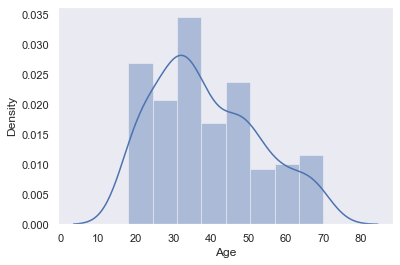

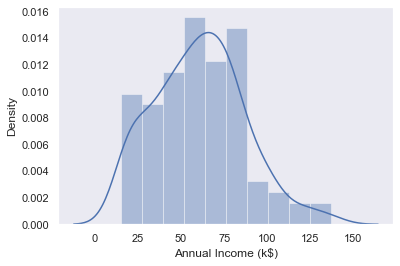

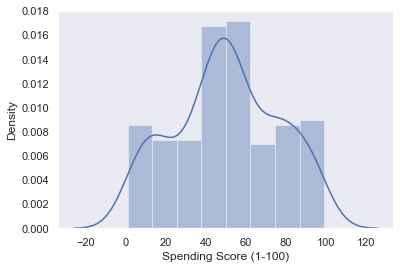

In [67]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
  plt.figure()
  sns.distplot(data[i])

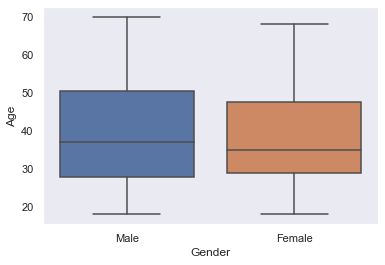

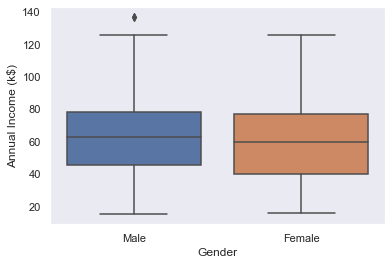

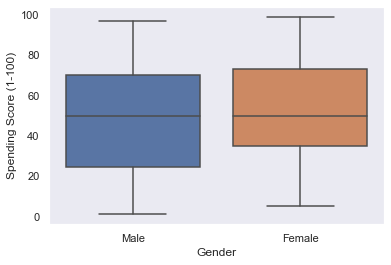

In [68]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
  plt.figure()
  sns.boxplot(data=data,x='Gender',y=data[i])

# BI-VARIATE ANALYSIS

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

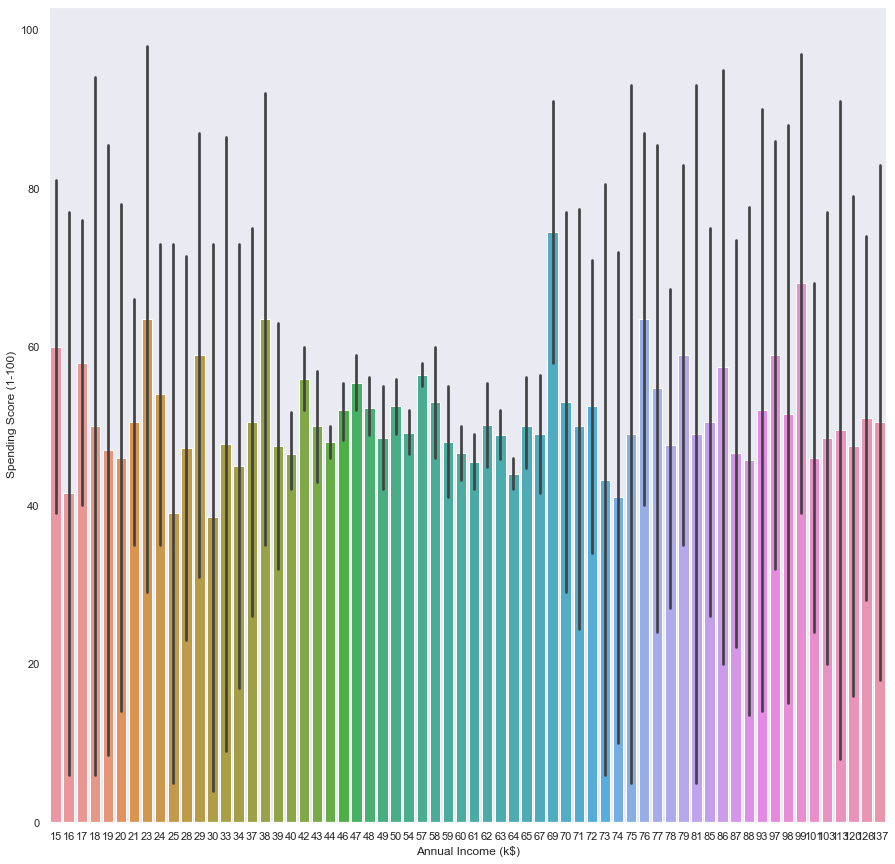

In [69]:
plt.figure(figsize=(15,15))
sns.barplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)')

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

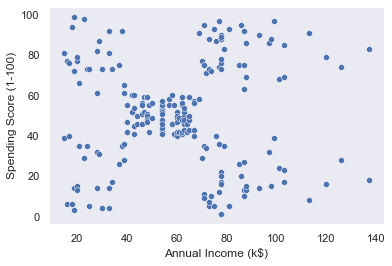

In [70]:
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)')

# MULTI-VARIATE ANALYSIS

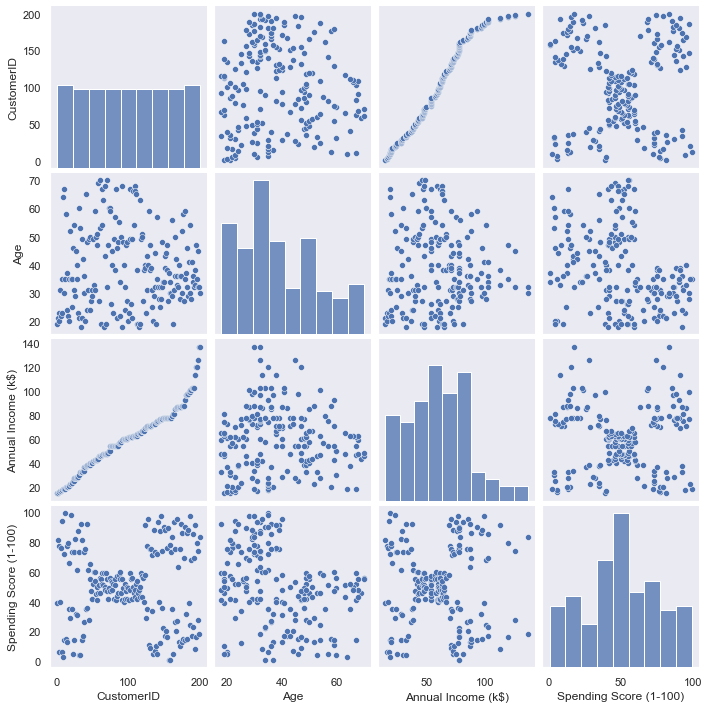

In [71]:
sns.pairplot(data)

<AxesSubplot:>

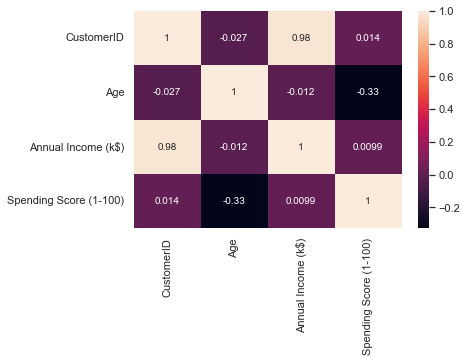

In [72]:
sns.heatmap(data.corr(), annot = True)

# 4. Perform descriptive statistics on the dataset.

In [73]:
data.mean()

CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [74]:
data.median()

CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [75]:
data.mode()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Female,32.0,54.0,42.0
1,2,NaN,NaN,78.0,NaN
2,3,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...
195,196,NaN,NaN,NaN,NaN
196,197,NaN,NaN,NaN,NaN
197,198,NaN,NaN,NaN,NaN
198,199,NaN,NaN,NaN,NaN


In [76]:
data.std()

CustomerID                57.879185
Age                       13.969007
Annual Income (k$)        26.264721
Spending Score (1-100)    25.823522
dtype: float64

In [77]:
data.var()

CustomerID                3350.000000
Age                        195.133166
Annual Income (k$)         689.835578
Spending Score (1-100)     666.854271
dtype: float64

In [78]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# 5. Check for Missing values and deal with them.

In [79]:
data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [80]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# 6. Find the outliers and replace them outliers

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

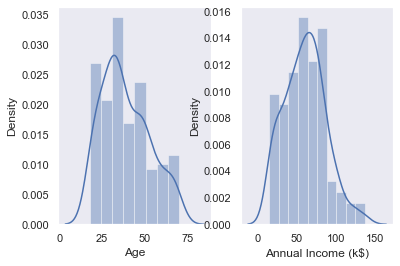

In [81]:
sns.set(style = 'dark')
plt.subplot(1,2,1)
sns.distplot(data['Age'])
plt.subplot(1,2,2)
sns.distplot(data['Annual Income (k$)'])

In [82]:
print("Highest allowed",data['Age'].mean() + 3*data['Age'].std())
print("Lowest allowed",data['Age'].mean() - 3*data['Age'].std())

Highest allowed 80.75702199467665
Lowest allowed -3.0570219946766386


In [83]:
new_data = data[(data['Age'] < 50) & (data['Age'] > 25)]
new_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
4,5,Female,31,17,40
6,7,Female,35,18,6
9,10,Female,30,19,72
11,12,Female,35,19,99
14,15,Male,37,20,13
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [84]:
upper_limit = data['Age'].mean() + 5*data['Age'].std()
lower_limit = data['Age'].mean() - 5*data['Age'].std()

In [85]:
data['Age'] = np.where(
    data['Age']>upper_limit,
    upper_limit,
    np.where(
        data['Age']<lower_limit,
        lower_limit,
        data['Age']
    )
)

In [86]:
data['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

# 7. Check for Categorical columns and perform encoding.

In [87]:
data_numeric = data[['CustomerID','Age', 'Annual Income (k$)','Spending Score (1-100)' ]]
data_categorical = data[['Gender']]

In [88]:
data_numeric.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19.0,15,39
1,2,21.0,15,81
2,3,20.0,16,6
3,4,23.0,16,77
4,5,31.0,17,40


In [89]:
data_categorical.head()

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female


In [90]:
print(data['CustomerID'].unique())
print(data['Gender'].unique())
print(data['Age'].unique())
print(data['Annual Income (k$)'].unique())
print(data['Spending Score (1-100)'].unique())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200]
['Male' 'Female']
[19. 21. 20. 23. 31. 22. 35. 64. 30. 67. 58. 24. 37. 52. 25. 46. 54. 29.
 45. 40. 60. 53. 18. 49. 42. 36. 65. 48. 50. 27. 33. 59. 47. 51. 69. 70.
 63. 43. 68. 32. 26. 57

In [91]:
gender_encoder = LabelEncoder()
gender_encoder.fit(data_categorical['Gender'])

LabelEncoder()

In [92]:
gender_values = gender_encoder.transform(data_categorical['Gender'])

In [93]:
print("Before Encoding:", list(data_categorical['Gender'][-10:]))
print("After Encoding:", gender_values[-10:])
print("The inverse from the encoding result:", gender_encoder.inverse_transform(gender_values[-10:]))

Before Encoding: ['Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male']
After Encoding: [0 0 1 0 0 0 0 1 1 1]
The inverse from the encoding result: ['Female' 'Female' 'Male' 'Female' 'Female' 'Female' 'Female' 'Male'
 'Male' 'Male']


# 8. Scaling the data

In [94]:
numCol  = [col for col in data.columns if  data[col].dtype != "O"] 
numCol

['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [95]:
catColumn  = [col for col in data.columns if  data[col].dtype == "O"]
catColumn

['Gender']

In [96]:
from sklearn.preprocessing import scale
X=data.drop(columns=['Age'],axis=1)
X.head()

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100)
0,1,Male,15,39
1,2,Male,15,81
2,3,Female,16,6
3,4,Female,16,77
4,5,Female,17,40


In [97]:
Y=data['Age']
Y

0      19.0
1      21.0
2      20.0
3      23.0
4      31.0
       ... 
195    35.0
196    45.0
197    32.0
198    32.0
199    30.0
Name: Age, Length: 200, dtype: float64

In [98]:
scaler=MinMaxScaler()
data[["Age"]]=scaler.fit_transform(data[["Age"]])
print(data)

     CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male  0.019231                  15                      39
1             2    Male  0.057692                  15                      81
2             3  Female  0.038462                  16                       6
3             4  Female  0.096154                  16                      77
4             5  Female  0.250000                  17                      40
..          ...     ...       ...                 ...                     ...
195         196  Female  0.326923                 120                      79
196         197  Female  0.519231                 126                      28
197         198    Male  0.269231                 126                      74
198         199    Male  0.269231                 137                      18
199         200    Male  0.230769                 137                      83

[200 rows x 5 columns]


# 9. Perform any of the clustering algorithms

In [99]:
clustering1 = KMeans(n_clusters=6)
clustering1.fit(data[['Annual Income (k$)']])

KMeans(n_clusters=6)

In [100]:
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4,
       4, 4])

In [101]:
data['Income Cluster']=clustering1.labels_
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,0.019231,15,39,2
1,2,Male,0.057692,15,81,2
2,3,Female,0.038462,16,6,2
3,4,Female,0.096154,16,77,2
4,5,Female,0.250000,17,40,2


In [102]:
data['Income Cluster'].value_counts()

0    48
3    42
5    42
2    32
1    28
4     8
Name: Income Cluster, dtype: int64

In [103]:
clustering1.inertia_

5050.904761904762

# 10. Add the cluster data with the primary dataset

In [104]:
inertia_scores=[data]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(data[['Annual Income (k$)']])
  inertia_scores.append(kmeans.inertia_)

In [105]:
inertia_scores

[     CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)  \
 0             1    Male  0.019231                  15                      39   
 1             2    Male  0.057692                  15                      81   
 2             3  Female  0.038462                  16                       6   
 3             4  Female  0.096154                  16                      77   
 4             5  Female  0.250000                  17                      40   
 ..          ...     ...       ...                 ...                     ...   
 195         196  Female  0.326923                 120                      79   
 196         197  Female  0.519231                 126                      28   
 197         198    Male  0.269231                 126                      74   
 198         199    Male  0.269231                 137                      18   
 199         200    Male  0.230769                 137                      83   
 
      Income C

In [106]:
data_one = data[['Age','Spending Score (1-100)']]
mydata=[]
for n in range(1,10):
    kmeans = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=400, 
                    tol=0.0001,  random_state= 45 ) )
    kmeans.fit(data_one)
    mydata.append(kmeans.inertia_)

In [107]:
kmeans = KMeans(n_clusters = 4, random_state = 45)
k_fit = kmeans.fit(data_one)
clusters = k_fit.labels_

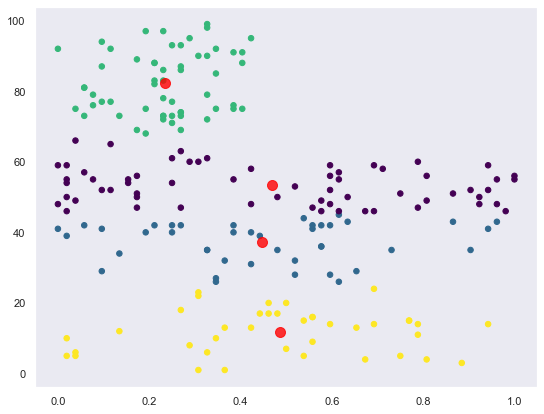

In [108]:
plt.figure(figsize = [9, 7], clear = False)
clusters = k_fit.labels_
centers = k_fit.cluster_centers_
plt.scatter(data_one['Age'],data_one['Spending Score (1-100)'],c = clusters,s = 30,cmap = "viridis")
plt.scatter(centers[:, 0],centers[:, 1],c = "red",s = 100,alpha = 0.8);

In [109]:
data = pd.DataFrame({"CustomerID": data['CustomerID'], "Group": (k_fit.labels_ + 1)})
data.head(10)

,CustomerID,Group
0,1,2
1,2,3
2,3,4
3,4,3
4,5,2
5,6,3
6,7,4
7,8,3
8,9,4
9,10,3


# 11. Split the data into dependent and independent variables.

In [ ]:
from sklearn.preprocessing import scale
X_Scaled = pd.DataFrame(scale(X), columns=X.columns)
X_Scaled.head()

# 12. Split the data into test and training .

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [111]:
X_train

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100)
134,135,Male,73,5
66,67,Female,48,50
26,27,Female,28,32
113,114,Male,64,46
168,169,Female,87,27
...,...,...,...,...
67,68,Female,48,48
192,193,Male,113,8
117,118,Female,65,59
47,48,Female,40,47


In [112]:
X_test

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100)
18,19,Male,23,29
170,171,Male,87,13
107,108,Male,63,46
98,99,Male,61,42
177,178,Male,88,69
182,183,Male,98,15
5,6,Female,17,76
146,147,Male,77,36
12,13,Female,20,15
152,153,Female,78,20


In [114]:
Y_test

18     0.653846
170    0.423077
107    0.692308
98     0.576923
177    0.173077
182    0.538462
5      0.076923
146    0.576923
12     0.769231
152    0.500000
61     0.019231
125    0.250000
180    0.365385
154    0.557692
80     0.750000
7      0.096154
33     0.000000
130    0.557692
37     0.230769
74     0.788462
183    0.211538
145    0.192308
45     0.115385
159    0.230769
60     1.000000
123    0.403846
179    0.326923
185    0.230769
122    0.423077
44     0.596154
16     0.326923
55     0.557692
150    0.480769
111    0.019231
22     0.538462
189    0.346154
129    0.384615
4      0.250000
83     0.538462
106    0.923077
Name: Age, dtype: float64

In [115]:
Y_train

134    0.038462
66     0.480769
26     0.519231
113    0.019231
168    0.346154
         ...   
67     0.961538
192    0.288462
117    0.596154
47     0.173077
172    0.346154
Name: Age, Length: 160, dtype: float64

# 13. Build the Model

In [128]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,criterion='entropy')

In [ ]:
model.fit(X_train,y_train)

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
y_predict_train = model.predict(X_train)

# 14. Train the Model

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Training accuracy: ',accuracy_score(y_train,y_predict_train))

# 15. Test the Model

In [ ]:
print('Testing accuracy: ',accuracy_score(y_test,y_predict))

# 16. Measure the performance using Evaluation Metrics.

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
X_train=[5,-1,2,10]
Y_test=[3.5,-0.9,2,9.9]
print('RSquared=',r2_score(X_train,Y_test))
print('MAE=',mean_absolute_error(X_train,Y_test))
print('MSE=',mean_squared_error(X_train,Y_test))